# Maintenance of Naval Propulsion Plants Data Set
Predicting Gas Turbine propulsion plant's decay state coefficient

Data Set Information:

The experiments have been carried out by means of a numerical simulator of a naval vessel (Frigate) characterized by a Gas Turbine (GT) propulsion plant. The different blocks forming the complete simulator (Propeller, Hull, GT, Gear Box and Controller) have been developed and fine tuned over the year on several similar real propulsion plants. In view of these observations the available data are in agreement with a possible real vessel. In this release of the simulator it is also possible to take into account the performance decay over time of the GT components such as GT compressor and turbines. The propulsion system behaviour has been described with this parameters: - Ship speed (linear function of the lever position lp). - Compressor degradation coefficient kMc. - Turbine degradation coefficient kMt. so that each possible degradation state can be described by a combination of this triple (lp,kMt,kMc). The range of decay of compressor and turbine has been sampled with an uniform grid of precision 0.001 so to have a good granularity of representation. In particular for the compressor decay state discretization the kMc coefficient has been investigated in the domain [1; 0.95], and the turbine coefficient in the domain [1; 0.975]. Ship speed has been investigated sampling the range of feasible speed from 3 knots to 27 knots with a granularity of representation equal to tree knots. A series of measures (16 features) which indirectly represents of the state of the system subject to performance decay has been acquired and stored in the dataset over the parameter's space. 

Attribute Information:

A 16-feature vector containing the GT measures at steady state of the physical asset: Lever position (lp) [ ] Ship speed (v) [knots] Gas Turbine (GT) shaft torque (GTT) [kN m] GT rate of revolutions (GTn) [rpm] Gas Generator rate of revolutions (GGn) [rpm] Starboard Propeller Torque (Ts) [kN] Port Propeller Torque (Tp) [kN] Hight Pressure (HP) Turbine exit temperature (T48) [C] GT Compressor inlet air temperature (T1) [C] GT Compressor outlet air temperature (T2) [C] HP Turbine exit pressure (P48) [bar] GT Compressor inlet air pressure (P1) [bar] GT Compressor outlet air pressure (P2) [bar] GT exhaust gas pressure (Pexh) [bar] Turbine Injecton Control (TIC) [%] Fuel flow (mf) [kg/s]


    o    GT Compressor decay state coefficient


    o    GT Turbine decay state coefficient

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
cols = ['lever_pos','ship_spd','gas_trb_sft_trq','gas_trb_rate_rvl','gas_gen_rate_rvl','stb_prop_trq','prt_prop_trq','HP_trb_ext_temp','GT_comp_inlt_temp','GT_comp_otlt_temp','HP_trb_ext_pres','GT_comp_inlt_pres','GT_comp_otlt_pres','Gas_trb_exst_gas_pres','Trb_inj_cnt','Fuel_flow','GT_comp_dcy_stt_coef','GT_trb_dcy_stt_coef']
data = pd.read_csv('/Users/ferideaxu/Downloads/NavalProp/data.txt', sep='\s+', header=None, names=cols)
data.head()

,lever_pos,ship_spd,gas_trb_sft_trq,gas_trb_rate_rvl,gas_gen_rate_rvl,stb_prop_trq,prt_prop_trq,HP_trb_ext_temp,GT_comp_inlt_temp,GT_comp_otlt_temp,HP_trb_ext_pres,GT_comp_inlt_pres,GT_comp_otlt_pres,Gas_trb_exst_gas_pres,Trb_inj_cnt,Fuel_flow,GT_comp_dcy_stt_coef,GT_trb_dcy_stt_coef
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [8]:
data.shape

(11934, 18)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
lever_pos                11934 non-null float64
ship_spd                 11934 non-null float64
gas_trb_sft_trq          11934 non-null float64
gas_trb_rate_rvl         11934 non-null float64
gas_gen_rate_rvl         11934 non-null float64
stb_prop_trq             11934 non-null float64
prt_prop_trq             11934 non-null float64
HP_trb_ext_temp          11934 non-null float64
GT_comp_inlt_temp        11934 non-null float64
GT_comp_otlt_temp        11934 non-null float64
HP_trb_ext_pres          11934 non-null float64
GT_comp_inlt_pres        11934 non-null float64
GT_comp_otlt_pres        11934 non-null float64
Gas_trb_exst_gas_pres    11934 non-null float64
Trb_inj_cnt              11934 non-null float64
Fuel_flow                11934 non-null float64
GT_comp_dcy_stt_coef     11934 non-null float64
GT_trb_dcy_stt_coef      11934 non-null float64
dtypes: float64(18)
memory 

All the data is float64.

In [12]:
data.describe()

,lever_pos,ship_spd,gas_trb_sft_trq,gas_trb_rate_rvl,gas_gen_rate_rvl,stb_prop_trq,prt_prop_trq,HP_trb_ext_temp,GT_comp_inlt_temp,GT_comp_otlt_temp,HP_trb_ext_pres,GT_comp_inlt_pres,GT_comp_otlt_pres,Gas_trb_exst_gas_pres,Trb_inj_cnt,Fuel_flow,GT_comp_dcy_stt_coef,GT_trb_dcy_stt_coef
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.533635e-13,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


In [14]:
data.isnull().sum()

lever_pos                0
ship_spd                 0
gas_trb_sft_trq          0
gas_trb_rate_rvl         0
gas_gen_rate_rvl         0
stb_prop_trq             0
prt_prop_trq             0
HP_trb_ext_temp          0
GT_comp_inlt_temp        0
GT_comp_otlt_temp        0
HP_trb_ext_pres          0
GT_comp_inlt_pres        0
GT_comp_otlt_pres        0
Gas_trb_exst_gas_pres    0
Trb_inj_cnt              0
Fuel_flow                0
GT_comp_dcy_stt_coef     0
GT_trb_dcy_stt_coef      0
dtype: int64

There is no missing data.

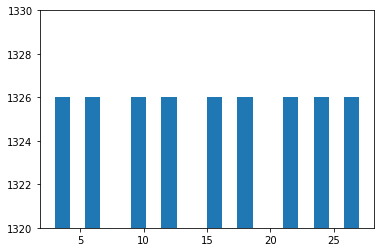

In [36]:
x=data['ship_spd'].values
y=data['GT_comp_dcy_stt_coef'].values
plt.hist(x, bins=20)
plt.ylim(1320,1330)
plt.show()

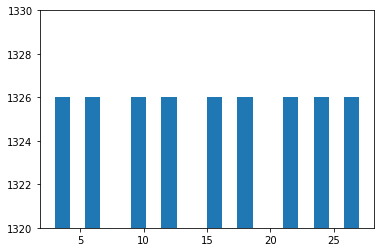

In [38]:
x=data['ship_spd'].values
y=data['GT_trb_dcy_stt_coef'].values
plt.hist(x, bins=20)
plt.ylim(1320,1330)
plt.show()

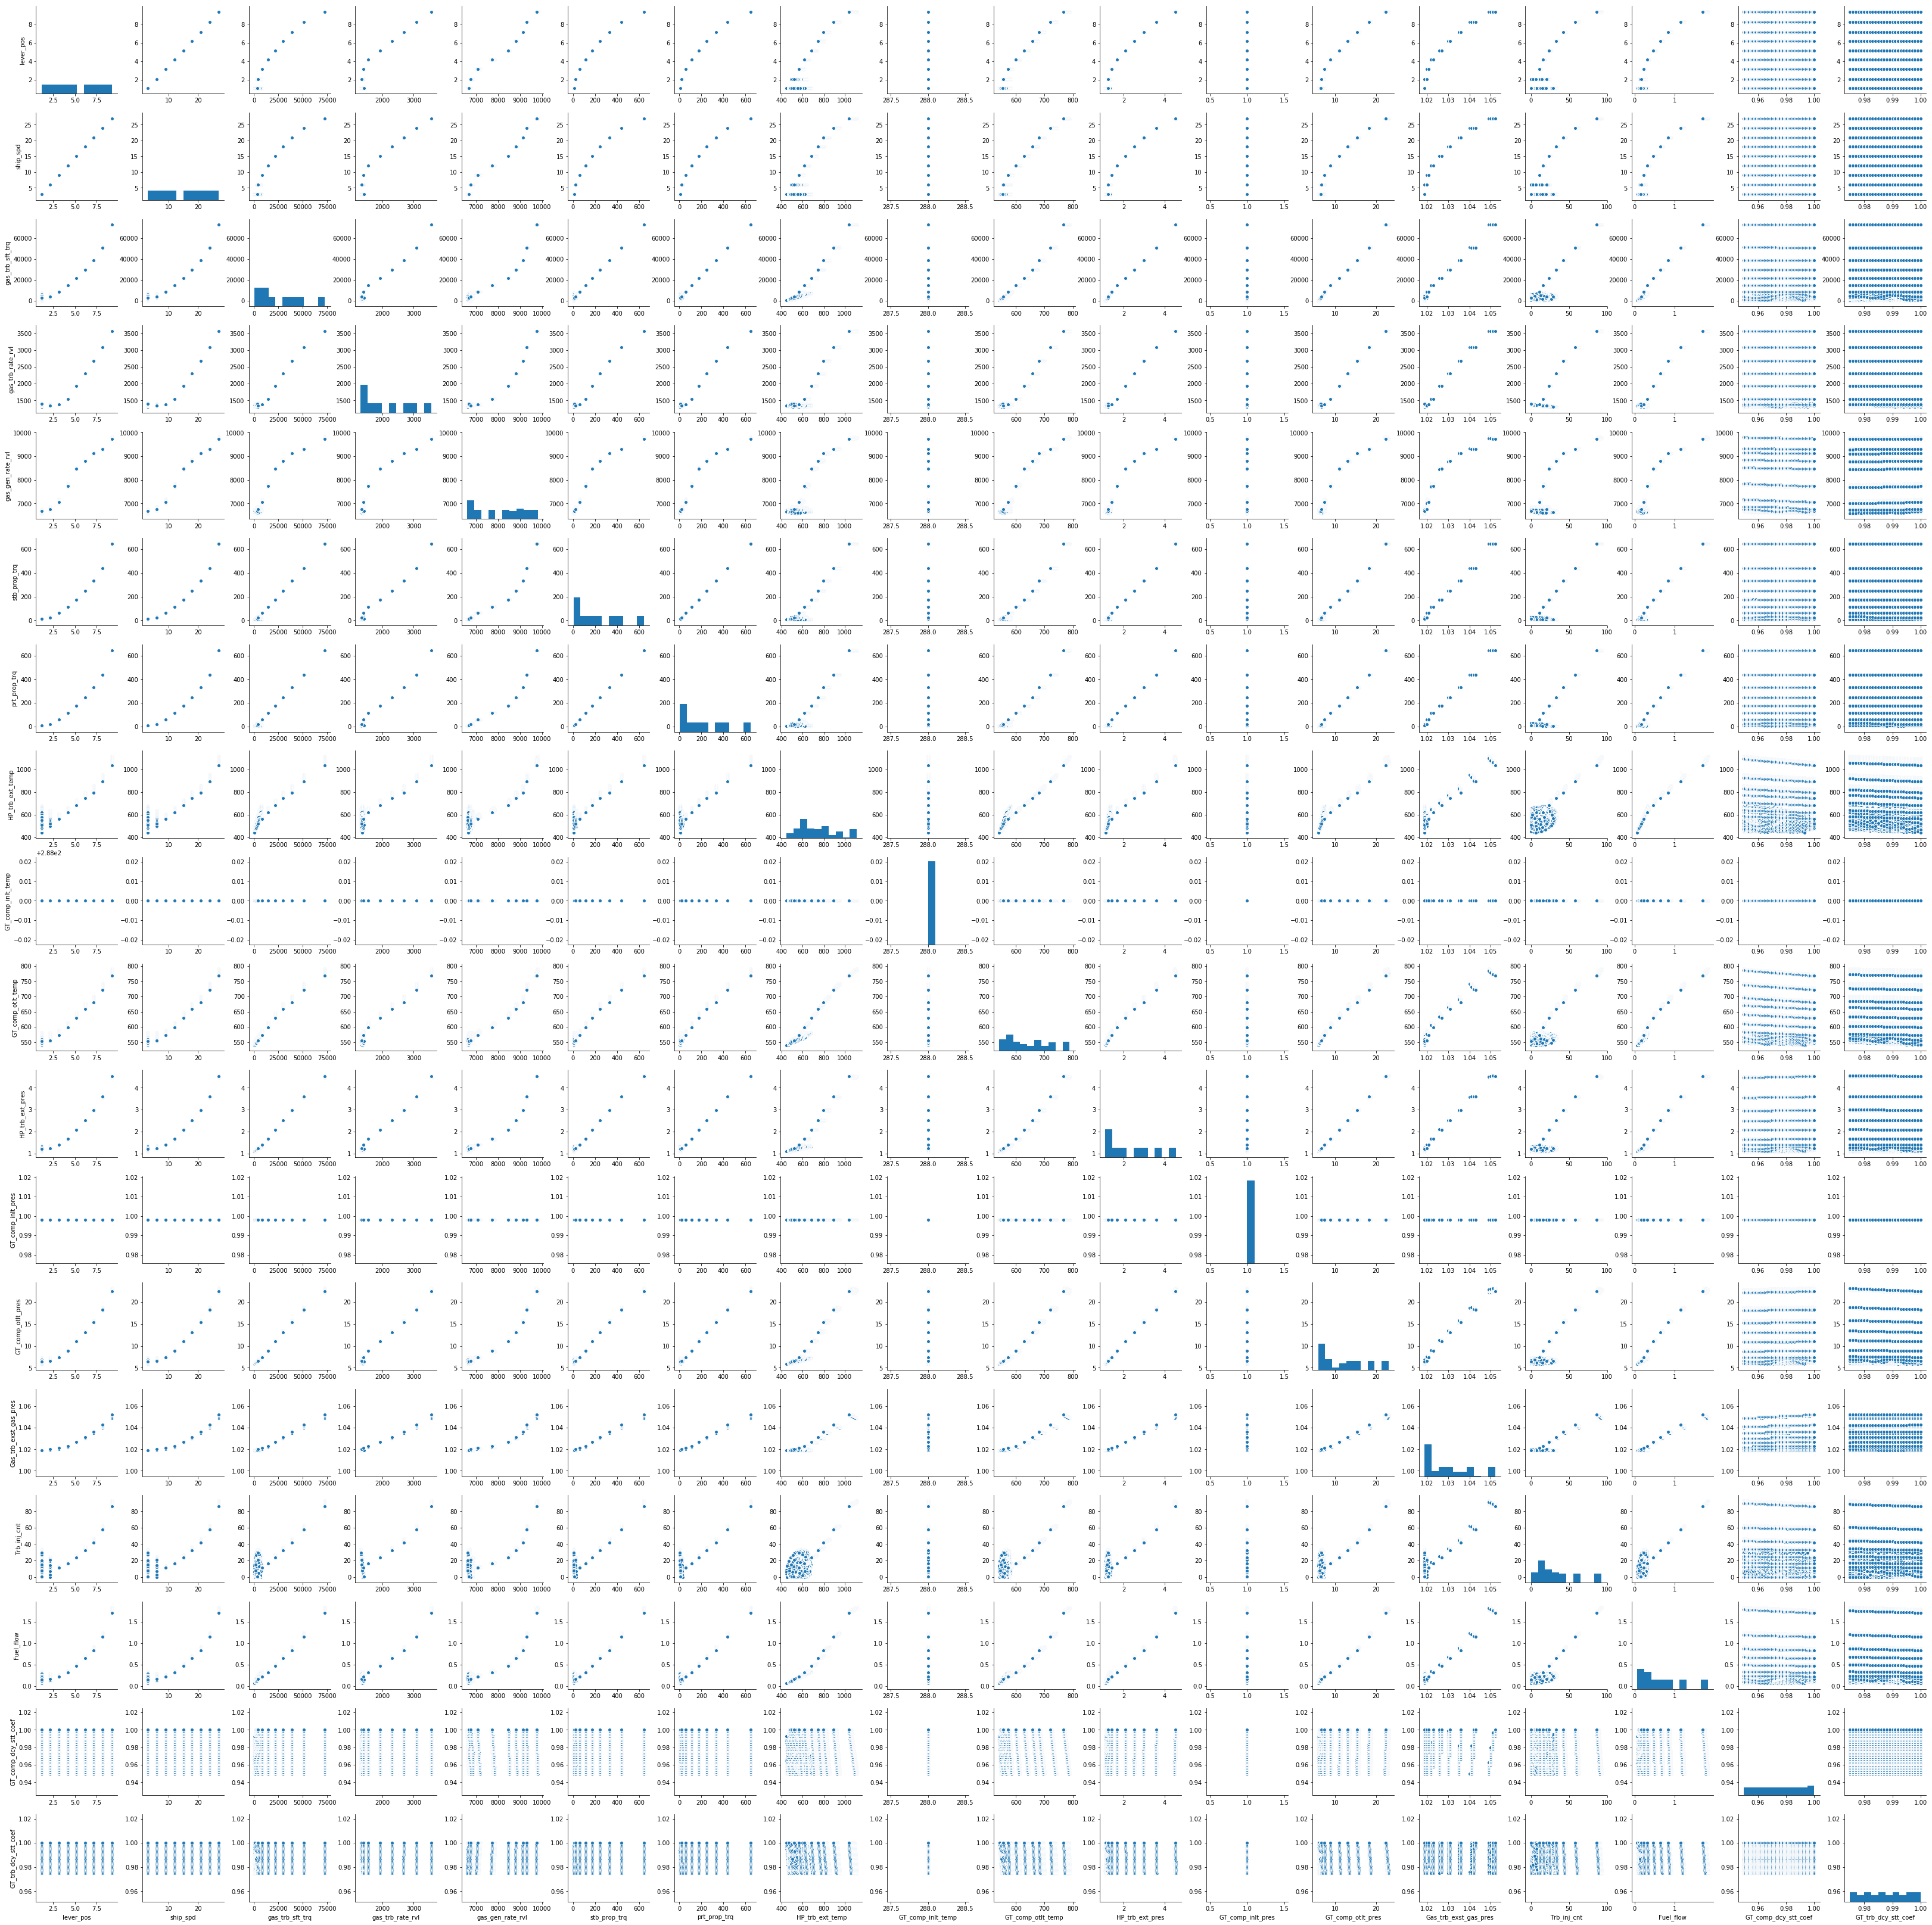

In [39]:
sns.pairplot(data)